## Visualize snapshots and cell division.

### Milky Way type halo.

********************* Initialization *********************
# Initial conditions for neutrinos:
PHIs = 10, THETAs=10, Vs=100
Total neutrinos: 10000
# Simulation parameters:
Simulation box: L012N376
Snapshot from 0062 (z=0) to 0013 (z=4)
Pre/Sim CPUs 6/6
DM limit for cells: 1000
# File management:
Box files directory: 
 /home/fabian/ownCloud/snellius/L012N376/CDM_TF50
Output directory: 
 /home/fabian/my_github_projects/neutrino_clustering_V2/L012N376/CDM_TF50
**********************************************************
********Number density band********
Halo batch params (Rvir,Mvir,cNFW):
[[299.54209457  12.45775108   8.69090077]]
***********************************
DM grav. bound to halo: 738294


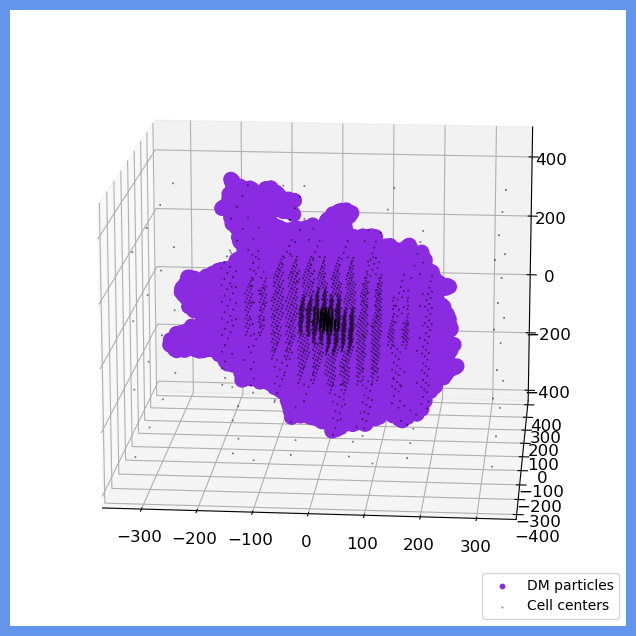

DM grav. bound to halo: 713350


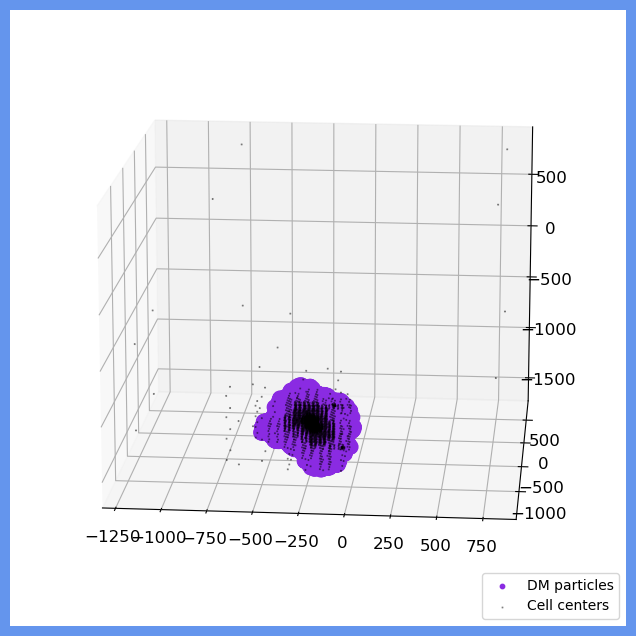

DM grav. bound to halo: 592788


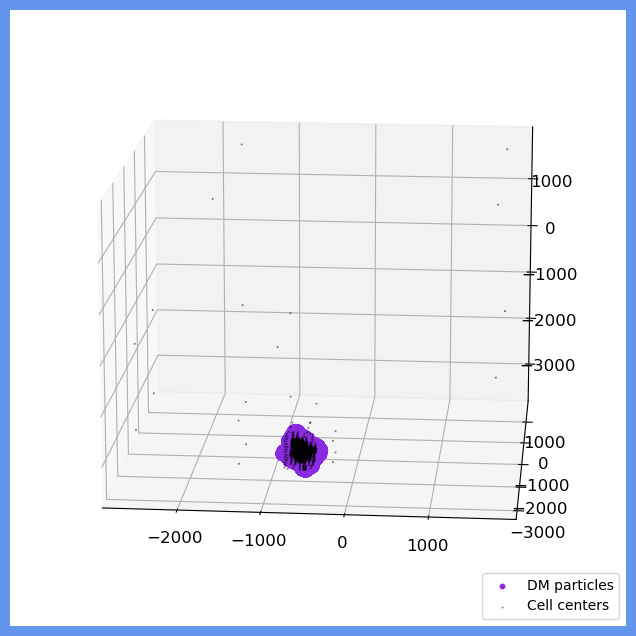

DM grav. bound to halo: 293444


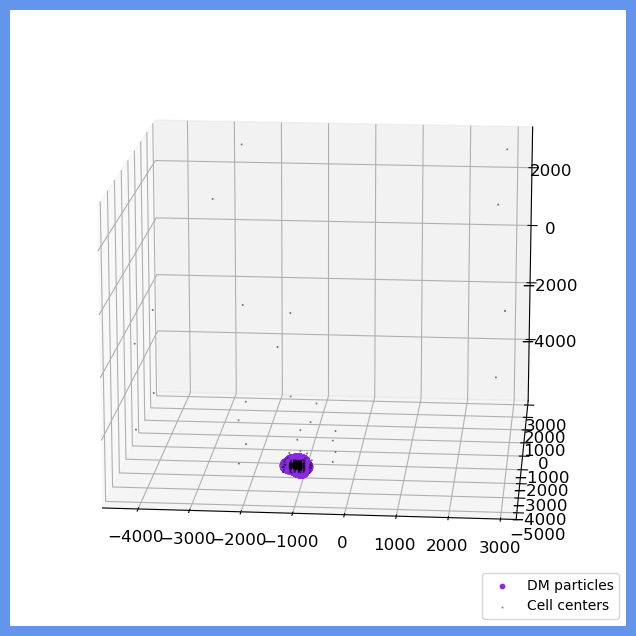

DM grav. bound to halo: 117564


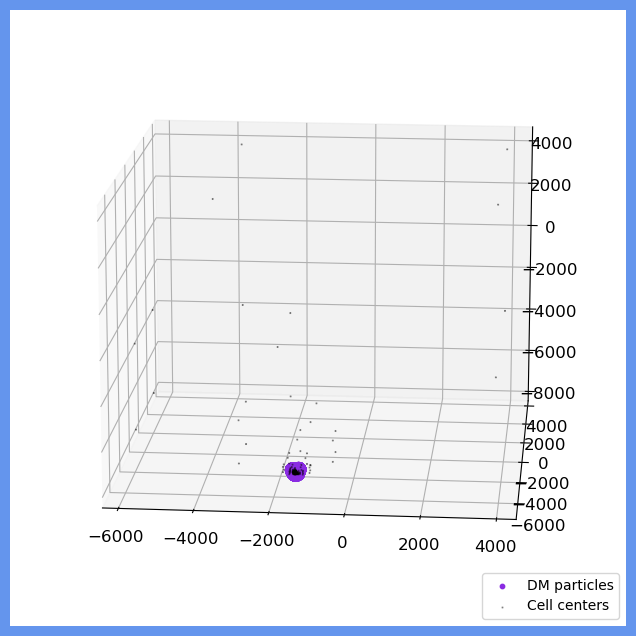

In [22]:
from matplotlib.pyplot import plot
from shared.preface import *
import shared.functions as fct

# ----------------------- #
# Isolate a MW-type halo. #
# ----------------------- #

# Initialize parameters and files.
PRE = PRE(
    # sim='L006N188', 
    sim='L012N376', 
    z0_snap=62, z4_snap=13, DM_lim=1000,
    sim_dir=SIM_ROOT, sim_ver=SIM_TYPE,
    phis=10, thetas=10, vels=100,
    pre_CPUs=6, sim_CPUs=6
)

mass_gauge = 12.3
mass_range = 0.3
size = 1
hname = f'1e+{mass_gauge}_pm{mass_range}Msun'
fct.halo_batch_indices(
    PRE.Z0_STR, mass_gauge, mass_range, 'halos', size, 
    hname, PRE.SIM_DIR, PRE.OUT_DIR
)
halo_batch_IDs = np.load(f'{PRE.OUT_DIR}/halo_batch_{hname}_indices.npy')
halo_batch_params = np.load(f'{PRE.OUT_DIR}/halo_batch_{hname}_params.npy')
halo_num = len(halo_batch_params)

print('********Number density band********')
print('Halo batch params (Rvir,Mvir,cNFW):')
print(halo_batch_params)
print('***********************************')

# Gravitationally bound DM to this halo.
halo_ID = 2
CoP = np.load(f'{PRE.OUT_DIR}/CoP_origID{halo_ID}_snap_0062.npy')

for i, snap in enumerate(PRE.NUMS_SNAPS[::-1][::10]):

    DM_raw = np.load(f'{PRE.OUT_DIR}/DM_pos_origID{halo_ID}_snap_{snap}.npy')
    print('DM grav. bound to halo:', len(DM_raw))

    DM_raw += CoP

    # Visualize grav. bound DM halo (with virial radius sphere).
    fig = plt.figure()
    fig.patch.set_facecolor('cornflowerblue')
    ax = fig.add_subplot(111, projection='3d')
    # ax.patch.set_facecolor('cornflowerblue')
    bubble_cmap = cc.cm.CET_D7  # blue-to-yellow, medium dark middle

    x_DM, y_DM, z_DM = DM_raw[:,0], DM_raw[:,1], DM_raw[:,2]
    cut = 1
    x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
    ax.scatter(x, y, z, alpha=1, c='blueviolet', s=100, label='DM particles')

    # rGC = halo_batch_params[0,0]
    # uGC, vGC = np.mgrid[0:2 * np.pi:200j, 0:np.pi:100j]
    # xGC = rGC * np.cos(uGC) * np.sin(vGC)
    # yGC = rGC * np.sin(uGC) * np.sin(vGC)
    # zGC = rGC * np.cos(vGC)
    # surf = ax.plot_surface(
    #     xGC, yGC, zGC, alpha=0.1, cmap=bubble_cmap,
    #     rstride=1, cstride=1, label=r'$R_{vir}$ sphere'
    # )
    # surf._facecolors2d = surf._facecolor3d
    # surf._edgecolors2d = surf._edgecolor3d

    fin_grid = np.load(f'{PRE.OUT_DIR}/fin_grid_origID{halo_ID}_snap_{snap}.npy')
    plot_grid = np.squeeze(fin_grid, axis=1) / kpc

    # plot_grid += CoP

    xg, yg, zg = plot_grid[:,0], plot_grid[:,1], plot_grid[:,2] 
    ax.scatter(
        xg, yg, zg, s=0.2, marker='x', color='black', 
        alpha=0.5, label='Cell centers'
    )

    # ax.set_title('Milky Way type halo', y=1.0, pad=-14)
    # ax.set_xlabel('\n x-axis (kpc)')
    # ax.set_ylabel('\n y-axis (kpc)')
    # ax.set_zlabel('\n z-axis (kpc)')
    # ax_lim = (1+(2*i))*350
    # ax.set_xlim(-ax_lim, ax_lim)
    # ax.set_ylim(-ax_lim, ax_lim)
    # ax.set_zlim(-ax_lim, ax_lim)
    ax.view_init(elev=15, azim=-85)

    lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
    lgnd.legendHandles[0]._sizes = [10]  # Increase DM dot in legend
    # plt.savefig(
    #     f'figures/DM_content_MWhalo_snap_{snap}.pdf', 
    #     facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
    # )
    plt.show()

In [ ]:
from shared.preface import *
import shared.functions as fct

# Load DM.
fname = f'gravBound_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

# Visualize grav. bound DM halo (with virial radius sphere).
fig = plt.figure()
fig.patch.set_facecolor('cornflowerblue')
ax = fig.add_subplot(111, projection='3d')
# ax.patch.set_facecolor('cornflowerblue')
bubble_cmap = cc.cm.CET_D7  # blue-to-yellow, medium dark middle

x_DM, y_DM, z_DM = DM_raw[:,0], DM_raw[:,1], DM_raw[:,2]
cut = 2
x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
ax.scatter(x, y, z, alpha=0.9, c='blueviolet', s=0.001, label='DM particles')

rGC = halo_batch_params[1,0]
uGC, vGC = np.mgrid[0:2 * np.pi:200j, 0:np.pi:100j]
xGC = rGC * np.cos(uGC) * np.sin(vGC)
yGC = rGC * np.sin(uGC) * np.sin(vGC)
zGC = rGC * np.cos(vGC)
surf = ax.plot_surface(
    xGC, yGC, zGC, alpha=0.1, cmap=bubble_cmap,
    rstride=1, cstride=1, label=r'$R_{vir}$ sphere'
)
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d

ax.set_title('Milky Way type halo', y=1.0, pad=-14)
ax.set_xlabel('\n x-axis (kpc)')
ax.set_ylabel('\n y-axis (kpc)')
ax.set_zlabel('\n z-axis (kpc)')
ax_lim = 350
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)
ax.view_init(elev=15, azim=-85)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [10]  # Increase DM dot in legend
# plt.savefig(
#     f'figures/DM_content_MWhalo_snap_{snap}.pdf', 
#     facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
# )
plt.show()

### Same MW-type halo and most massive sarrounding (sub)halos.

In [ ]:
from shared.preface import *
import shared.functions as fct

# Halo parameters.
sim = 'L012N376'
snap = '0036'
halo_ID = 4
DM_range_kpc = 500*kpc
halo_inRange_limit = 10

# Get rvir.
mass_gauge = 12.1  # in log10 Msun
mass_range = 0.1
hname = f'1e+{mass_gauge}_pm{mass_range}Msun'
halo_batch_params = np.load(f'{sim}/halo_batch_{hname}_params.npy')

fname = f'sarrounding_halos_DM'
fct.read_DM_halos_inRange(
    sim, snap, halo_ID, DM_range_kpc, halo_inRange_limit, fname
)
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')
print('DM grav. bound to halos in range:', len(DM_raw))

In [ ]:
# Visualize sarrounding halos.
fig = plt.figure()
fig.patch.set_facecolor('cornflowerblue')
ax = fig.add_subplot(111, projection='3d')
bubble_cmap = cc.cm.CET_D7  # blue-to-yellow, medium dark middle

# Load DM.
fname = f'sarrounding_halos_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

x_DM, y_DM, z_DM = DM_raw[:,0], DM_raw[:,1], DM_raw[:,2]
cut = 2
x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
ax.scatter(x, y, z, alpha=0.9, c='blueviolet', s=0.001, label='DM particles')

rGC = halo_batch_params[1,0]
uGC, vGC = np.mgrid[0:2 * np.pi:200j, 0:np.pi:100j]
xGC = rGC * np.cos(uGC) * np.sin(vGC)
yGC = rGC * np.sin(uGC) * np.sin(vGC)
zGC = rGC * np.cos(vGC)
surf = ax.plot_surface(
    xGC, yGC, zGC, alpha=0.1, cmap=bubble_cmap,
    rstride=1, cstride=1, label=r'$R_{vir}$ sphere (of main halo)'
)
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d

ax.set_title('MW type halo + sarrounding halos', y=1.0, pad=-14)
ax.set_xlabel('\n x-axis (kpc)')
ax.set_ylabel('\n y-axis (kpc)')
ax.set_zlabel('\n z-axis (kpc)')
ax_lim = 350
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)
ax.view_init(elev=15, azim=-85)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [10]  # Increase DM dot in legend
plt.savefig(
    'figures/Presi_sarrounding_halos.pdf', 
    facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
)
plt.show()

### Cell gravity grid: Initial.

In [ ]:
from shared.preface import *
import shared.functions as fct

# ---------------------- #
# Cell division process. #
# ---------------------- #
DM_lim_visual = 1000000

# Load DM.
fname = f'sarrounding_halos_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

# Initialize grid.
snap_GRID_L = (int(np.abs(DM_raw).max()) + 1)*kpc
raw_grid = fct.grid_3D(snap_GRID_L, snap_GRID_L/2)
init_grid = np.expand_dims(raw_grid, axis=1)

# Prepare arrays for cell division.
DM_raw *= kpc
DM_pos = np.expand_dims(DM_raw, axis=0)
DM_pos_for_cell_division = np.repeat(DM_pos, len(init_grid), axis=0)

# Cell division.
cell_division_count = fct.cell_division(
    init_grid, DM_pos_for_cell_division, snap_GRID_L, DM_lim_visual, None, 
    sim, fname
)

# Load files from cell division.
fin_grid = np.load(f'{sim}/fin_grid_{fname}.npy')
DM_count = np.load(f'{sim}/DM_count_{fname}.npy')
cell_com = np.load(f'{sim}/cell_com_{fname}.npy')
cell_gen = np.load(f'{sim}/cell_gen_{fname}.npy')

# Plot grid over DM.
fig = plt.figure()
fig.patch.set_facecolor('cornflowerblue')
ax = fig.add_subplot(111, projection='3d')

# Break up total DM array into all halos, and plot individually.
DM_raw /= kpc
DM_lengths = np.load(f'{sim}/DM_lengths_{fname}.npy')

for i, DM_length in enumerate(DM_lengths):

    start = int(np.sum(DM_lengths[:i]))
    stop = int(np.sum(DM_lengths[:i+1]))
    # print(start, stop)
    DM_halo = DM_raw[start:stop]

    x_DM, y_DM, z_DM = DM_halo[:,0], DM_halo[:,1], DM_halo[:,2]
    cut = 30
    x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
    ax.scatter(
        x, y, z, alpha=0.008, c='blueviolet', s=100
    )

plot_grid = np.squeeze(fin_grid, axis=1) / kpc
xg, yg, zg = plot_grid[:,0], plot_grid[:,1], plot_grid[:,2] 
ax.scatter(
    xg, yg, zg, s=1, marker='x', color='black', 
    alpha=1, label='Cell centers'
)

ax.set_title('Gravity grid structure: Initial', y=1.0, pad=-14)
ax.set_xlabel('\n x-axis (kpc)')
ax.set_ylabel('\n y-axis (kpc)')
ax.set_zlabel('\n z-axis (kpc)')
# ax_lim = 300
# ax.set_xlim(-ax_lim, ax_lim)
# ax.set_ylim(-ax_lim, ax_lim)
# ax.set_zlim(-ax_lim, ax_lim)
ax.view_init(elev=15, azim=-85)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [10]  # Increase DM dot in legend

plt.savefig(
    'figures/Presi_cell_grid_initial.pdf',
    facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
)
plt.show()

In [ ]:
from shared.preface import *
import shared.functions as fct

# ---------------------- #
# Cell division process. #
# ---------------------- #
DM_lim_visual = 1000

# Load DM.
fname = f'sarrounding_halos_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

# Initialize grid.
snap_GRID_L = (int(np.abs(DM_raw).max()) + 1)*kpc
raw_grid = fct.grid_3D(snap_GRID_L, snap_GRID_L)
init_grid = np.expand_dims(raw_grid, axis=1)

# Prepare arrays for cell division.
DM_raw *= kpc
DM_pos = np.expand_dims(DM_raw, axis=0)
DM_pos_for_cell_division = np.repeat(DM_pos, len(init_grid), axis=0)

# Cell division.
cell_division_count = fct.cell_division(
    init_grid, DM_pos_for_cell_division, snap_GRID_L, DM_lim_visual, None, 
    sim, fname
)

# Load files from cell division.
fin_grid = np.load(f'{sim}/fin_grid_{fname}.npy')
DM_count = np.load(f'{sim}/DM_count_{fname}.npy')
cell_com = np.load(f'{sim}/cell_com_{fname}.npy')
cell_gen = np.load(f'{sim}/cell_gen_{fname}.npy')

In [ ]:
# Plot grid over DM.
fig = plt.figure()
fig.patch.set_facecolor('cornflowerblue')
ax = fig.add_subplot(111, projection='3d')

# Load DM.
fname = f'sarrounding_halos_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

# Break up total DM array into all halos, and plot individually.
DM_lengths = np.load(f'{sim}/DM_lengths_{fname}.npy')

for i, DM_length in enumerate(DM_lengths):

    start = int(np.sum(DM_lengths[:i]))
    stop = int(np.sum(DM_lengths[:i+1]))
    # print(start, stop)
    DM_halo = DM_raw[start:stop]

    x_DM, y_DM, z_DM = DM_halo[:,0], DM_halo[:,1], DM_halo[:,2]
    cut = 30
    x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
    ax.scatter(
        x, y, z, alpha=0.008, c='blueviolet', s=100
    )

plot_grid = np.squeeze(fin_grid, axis=1) / kpc
xg, yg, zg = plot_grid[:,0], plot_grid[:,1], plot_grid[:,2] 
ax.scatter(
    xg, yg, zg, s=0.2, marker='x', color='black', 
    alpha=0.5, label='Cell centers'
)

ax.set_title('Gravity grid structure: Adapted', y=1.0, pad=-14)
ax.set_xlabel('\n x-axis (kpc)')
ax.set_ylabel('\n y-axis (kpc)')
ax.set_zlabel('\n z-axis (kpc)')
# ax_lim = 300
# ax.set_xlim(-ax_lim, ax_lim)
# ax.set_ylim(-ax_lim, ax_lim)
# ax.set_zlim(-ax_lim, ax_lim)
ax.view_init(elev=15, azim=-85)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [10]  # Increase DM dot in legend

plt.savefig(
    'figures/Presi_cell_grid_adapted.pdf',
    facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
)
plt.show()